Alex Bombrun 

created for DR2 preparation :

simulate ALLwise QSO as observed by Gaia

 J/ApJS/221/12/table1 

In [1]:
import numpy as np
import time
import matplotlib as mp
import matplotlib.pyplot as plt
import pandas as pd
import healpy as hp
%matplotlib inline

In [2]:
from astroquery.vizier import Vizier

In [3]:
import astropy.units as u
from astropy.coordinates.sky_coordinate import SkyCoord
from astropy.units import Quantity

In [4]:
from context import gaiapix
import gaiapix.gaiapix as hp

In [5]:
mp.rcParams['figure.figsize'] = (12, 8)

In [6]:
HE0435 =  SkyCoord.from_name("HE 0435-1223")

In [7]:
tables = Vizier.query_object("HE 0435-1223")

In [8]:
Vizier.ROW_LIMIT = 3000000

In [9]:
%time c = Vizier.get_catalogs(['J/ApJS/221/12/table1'])

CPU times: user 48.6 s, sys: 735 ms, total: 49.3 s
Wall time: 49.4 s


In [10]:
r=c.values()[0]

In [11]:
len(r)

1354775

In [12]:
r[:10]

WISEA,RAJ2000,DEJ2000,W1-W2,W2-W3,W1mag,gmag,z,f_z,LQAC2,DR12Q,HMQ,Sloan
,deg,deg,mag,mag,mag,mag,,,,,,
bytes19,float64,float64,float32,float32,float32,float32,float64,bytes1,bytes11,bytes18,bytes25,bytes5
J010112.73-021013.4,15.3030541,-2.1704141,1.71,4.37,14.90,--,--,,,,,Sloan
J010019.55-021347.9,15.0814943,-2.2299990,1.02,2.66,14.76,--,0.70000,p,,,BOSS J010019.56-021347.9,Sloan
J005949.31-015747.2,14.9554774,-1.9631265,0.97,3.30,13.14,--,--,,,,,Sloan
J010303.45-015647.1,15.7644001,-1.9464191,1.18,3.25,15.75,--,2.00000,p,,,BOSS J010303.47-015647.0,Sloan
J005847.73-021434.4,14.6988803,-2.2429080,1.24,4.07,16.32,--,--,,,,,Sloan
J005734.44-011732.8,14.3935405,-1.2924635,1.19,3.46,15.91,--,--,,,,J005734.4-011733,Sloan
J010316.71-012804.9,15.8196251,-1.4680342,1.55,4.56,17.24,--,--,,,,,Sloan
J010205.60-015038.1,15.5233336,-1.8439318,1.53,3.39,14.25,--,1.32000,s,015-001_005,,LBQS 0059-0206,Sloan


In [13]:
d = r.to_pandas()

In [14]:
d['alpha'] = d['RAJ2000']*u.deg.to(u.rad)-np.pi
d['delta'] = d['DEJ2000']*u.deg.to(u.rad)

Text(0.5,0,'z')

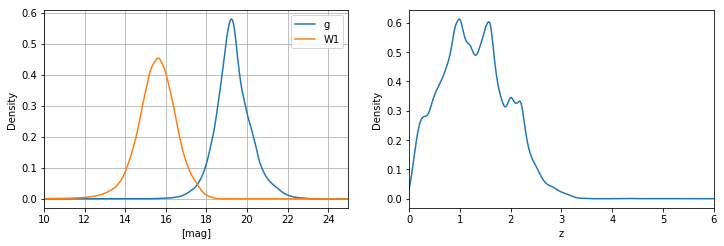

In [15]:
s = d.sample(frac=0.1)
plt.subplot(221)
d.gmag.plot.kde(label="g")
s.W1mag.plot.kde(label="W1")
plt.legend()
plt.xlim(10,25)
plt.grid()
plt.xlabel("[mag]")

plt.subplot(222)
d.z.plot.kde()
plt.xlim(0,6)
plt.xlabel('z')

QSO selection in ALL wise catalogue

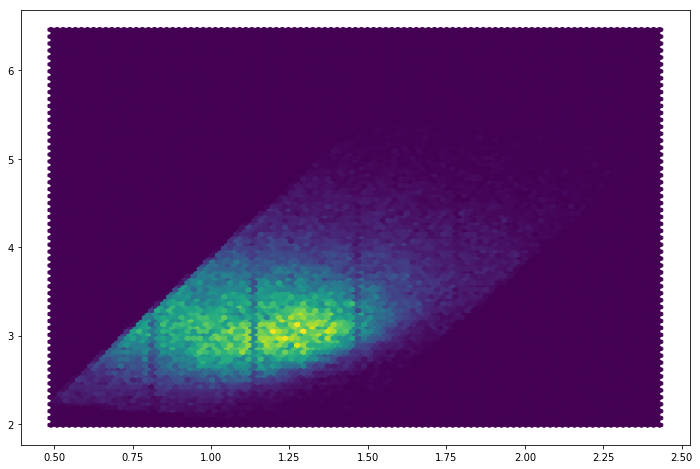

In [16]:
plt.hexbin(s['W1-W2'],s['W2-W3'])

In [17]:
d.groupby(np.floor(d.gmag)).WISEA.count()

gmag
14.0        2
15.0       71
16.0      613
17.0     4753
18.0    28363
19.0    45678
20.0    15710
21.0     3511
22.0      484
23.0       29
24.0        7
25.0        6
Name: WISEA, dtype: int64

In [18]:
d[np.isnan(d.gmag)].count()

WISEA      1255548
RAJ2000    1255548
DEJ2000    1255548
W1-W2      1255548
W2-W3      1255548
W1mag      1255548
gmag             0
z            92747
f_z        1255548
LQAC2      1255548
DR12Q      1255548
HMQ        1255548
Sloan      1255548
alpha      1255548
delta      1255548
dtype: int64

Text(0,0.5,'W1 [mag]')

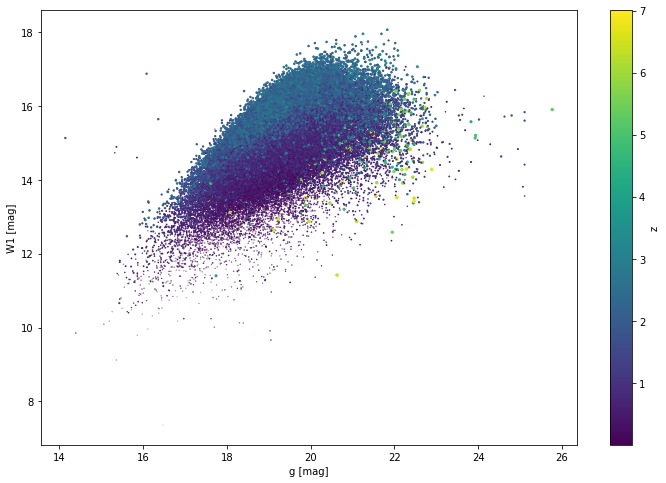

In [19]:
plt.scatter(d.gmag,d.W1mag,c=d.z,s=d.z)
plt.colorbar(label="z")
plt.xlabel("g [mag]")
plt.ylabel("W1 [mag]")

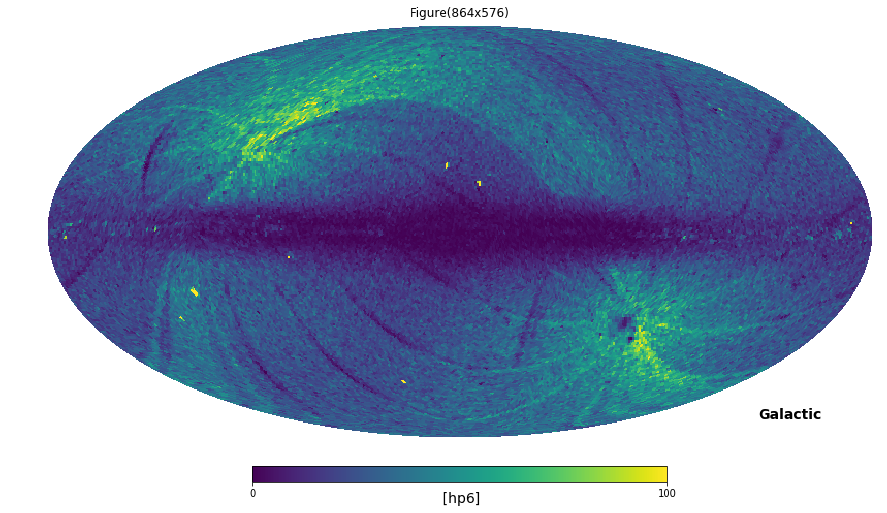

In [20]:
hpX = hp.gaiapix(6)
d['hp'] = hpX.angle2pixel(d.RAJ2000,d.DEJ2000)
hpX.setHpCount(d)
f = plt.figure()
hpX.plot(f,vmin=0,vmax=100,cmap=mp.cm.viridis,coord='G')

/Users/abombrun/anaconda3/lib/python3.6/site-packages/healpy/pixelfunc.py:304: RuntimeWarning: invalid value encountered in less_equal
  return np.absolute(m - badval) <= atol + rtol * np.absolute(badval)
/Users/abombrun/anaconda3/lib/python3.6/site-packages/healpy/projaxes.py:1053: RuntimeWarning: invalid value encountered in less
  result.data[result.data<0]=0.0
/Users/abombrun/anaconda3/lib/python3.6/site-packages/healpy/projaxes.py:1054: RuntimeWarning: invalid value encountered in greater
  result.data[result.data>1]=1.0


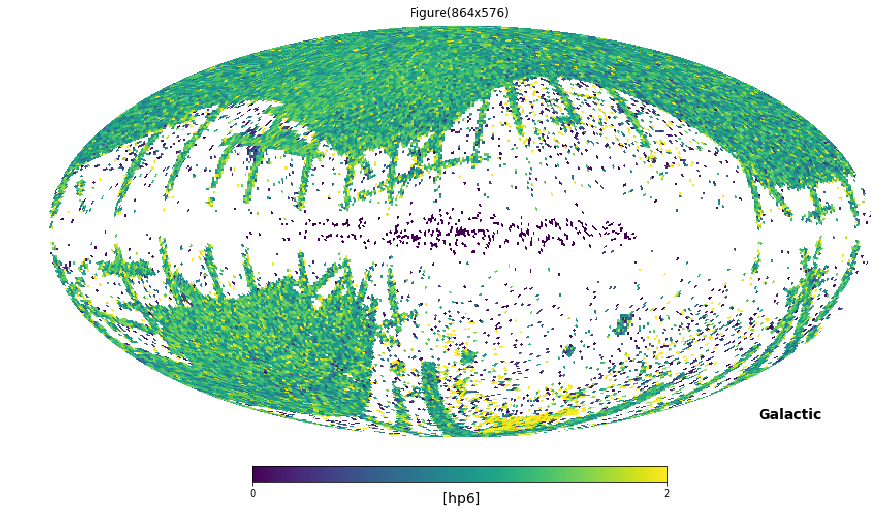

In [21]:
hpX = hp.gaiapix(6)
d['hp'] = hpX.angle2pixel(d.RAJ2000,d.DEJ2000)
hpX.setHpValues(d,keyValue='z')
f = plt.figure()
hpX.plot(f,vmin=0,vmax=2,cmap=mp.cm.viridis,coord='G')

/Users/abombrun/anaconda3/lib/python3.6/site-packages/healpy/pixelfunc.py:304: RuntimeWarning: invalid value encountered in less_equal
  return np.absolute(m - badval) <= atol + rtol * np.absolute(badval)
/Users/abombrun/anaconda3/lib/python3.6/site-packages/healpy/projaxes.py:1053: RuntimeWarning: invalid value encountered in less
  result.data[result.data<0]=0.0
/Users/abombrun/anaconda3/lib/python3.6/site-packages/healpy/projaxes.py:1054: RuntimeWarning: invalid value encountered in greater
  result.data[result.data>1]=1.0


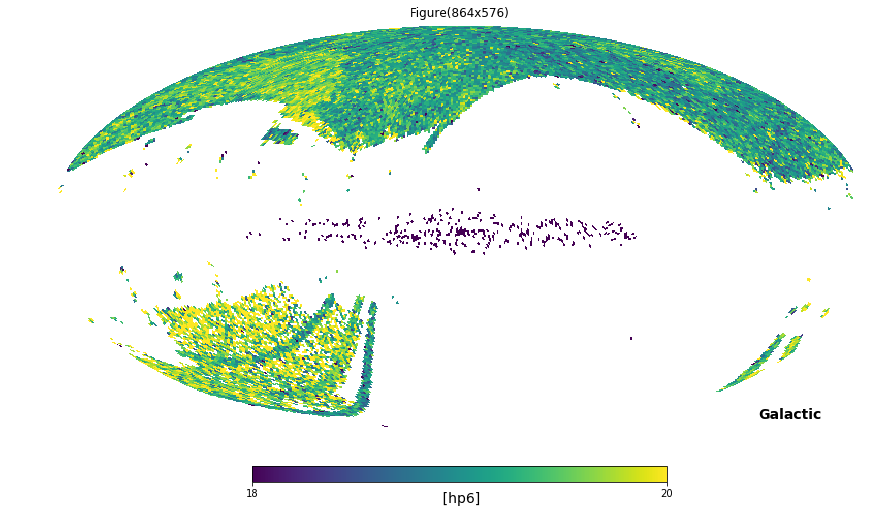

In [22]:
hpX = hp.gaiapix(6)
d['hp'] = hpX.angle2pixel(d.RAJ2000,d.DEJ2000)
hpX.setHpValues(d,keyValue='gmag')
f = plt.figure()
hpX.plot(f,vmin=18,vmax=20,cmap=mp.cm.viridis,coord='G')

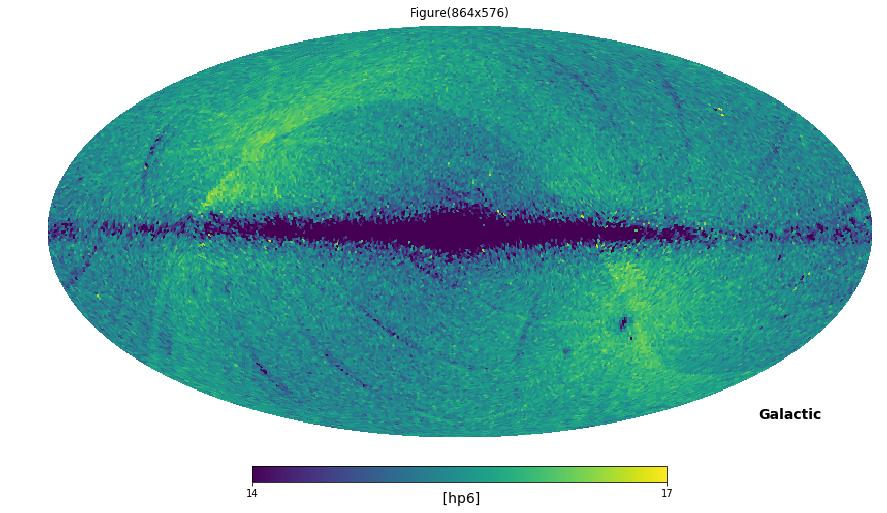

In [23]:
hpX = hp.gaiapix(6)
d['hp'] = hpX.angle2pixel(d.RAJ2000,d.DEJ2000)
hpX.setHpValues(d,keyValue='W1mag')
f = plt.figure()
hpX.plot(f,vmin=14,vmax=17,cmap=mp.cm.viridis,coord='G')

In [24]:
d['l'] = SkyCoord(d.RAJ2000.values,d.DEJ2000.values,unit=u.deg).galactic.l.deg
d['b'] = SkyCoord(d.RAJ2000.values,d.DEJ2000.values,unit=u.deg).galactic.b.deg

# simulated GAIA Allwise

In [25]:
columns = ['ra','ra_error','dec','dec_error','ra_dec_corr',
           'parallax','parallax_error',
           'pmra','pmra_error','pmdec','pmdec_error',
           'phot_g_mean_mag']

In [26]:
def DR1error(g): 
    if g <= 15 :
        return 0.05 
    return 0.05*np.exp(0.2*(g-15)*(g-15))

DR1error = np.vectorize(DR1error)

def pm_error_DR2(g): 
    if g <= 15 :
        return 0.06
    return 0.06*np.exp(0.6*(g-15))

pm_error_DR2 = np.vectorize(pm_error_DR2)

def parallax_error_DR2(g): 
    if g <= 15 :
        return 0.04
    return 0.04*np.exp(0.5*(g-15)+0.01*(g-15)*(g-15))

parallax_error_DR2 = np.vectorize(parallax_error_DR2)

In [27]:
def randomFromData(data,n,range=(-1,1),bins=1000) : 
    """generate n random points following data distribution"""
    hist, bins = np.histogram(data, bins=bins,range=range)
    bin_midpoints = bins[:-1] + np.diff(bins)/2
    cdf = np.cumsum(hist)
    cdf = cdf / cdf[-1]
    values = np.random.rand(n)
    value_bins = np.searchsorted(cdf, values)
    random_from_cdf = bin_midpoints[value_bins]
    return random_from_cdf

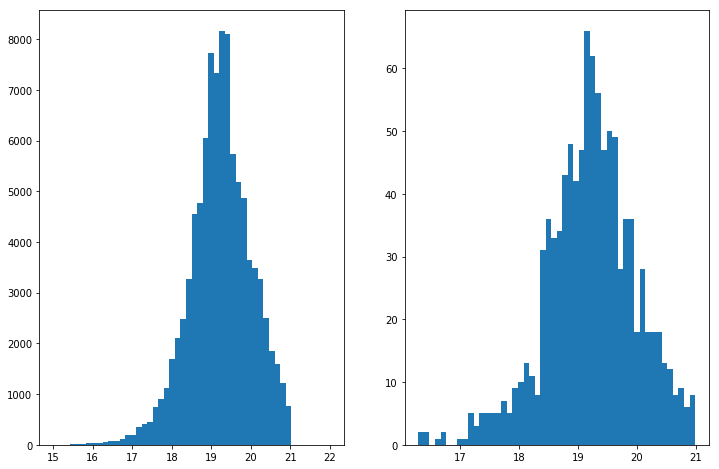

In [28]:
data = np.random.normal(size=1000)
plt.subplot(121)
plt.hist(d[d.gmag<21].gmag, 50,range=(15,22))
plt.subplot(122)
plt.hist(randomFromData(d[d.gmag<21].gmag,1000,range=(15,22)), bins=50)
plt.show()

In [29]:
d['ra'] =  d['RAJ2000']
d['dec'] = d['DEJ2000']
d['phot_g_mean_mag'] = randomFromData(d[d.gmag<21].gmag,len(d),range=(15,22))
d['ra_error'] = DR1error(d.phot_g_mean_mag)
d['dec_error'] = d['ra_error']
d['pmra_error'] = pm_error_DR2(d.phot_g_mean_mag)
d['pmdec_error'] = d['pmra_error']
d['pmra'] = np.random.normal(scale=d.pmra_error,size=len(d))
d['pmdec'] = np.random.normal(scale=d.pmdec_error,size=len(d))
d['parallax_error'] = parallax_error_DR2(d.phot_g_mean_mag)
d['parallax'] = np.random.normal(scale=d.parallax_error,size=len(d))

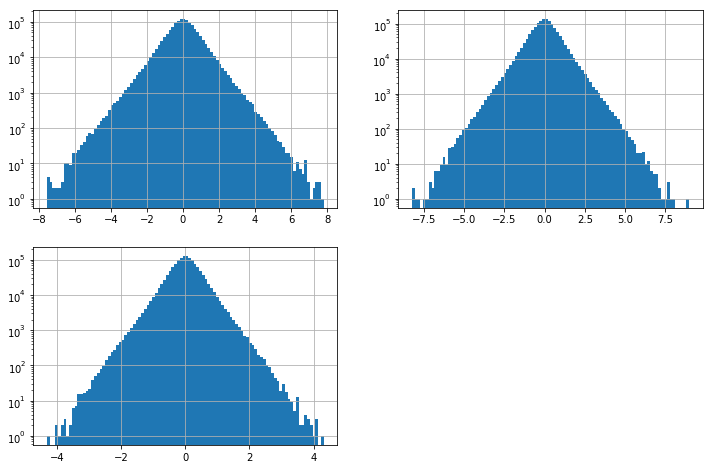

In [30]:
plt.subplot(221)
d.pmra.hist(bins=100)
plt.yscale('log')
plt.subplot(222)
d.pmdec.hist(bins=100)
plt.yscale('log')
plt.subplot(223)
d.parallax.hist(bins=100)
plt.yscale('log')

ignore a galactive band of 10 degree

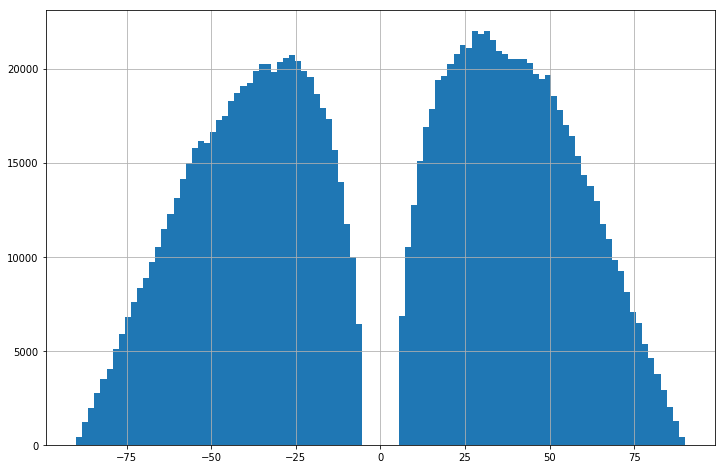

In [31]:
d[np.abs(np.sin(d.b*u.deg.to(u.rad)))>0.1].b.hist(bins=100)

one should only take a fraction of it

In [32]:
dsim = d[(np.abs(np.sin(d.b*u.deg.to(u.rad)))>0.1)].sample(frac=0.3)

In [33]:
dsim.ra.count()

393907

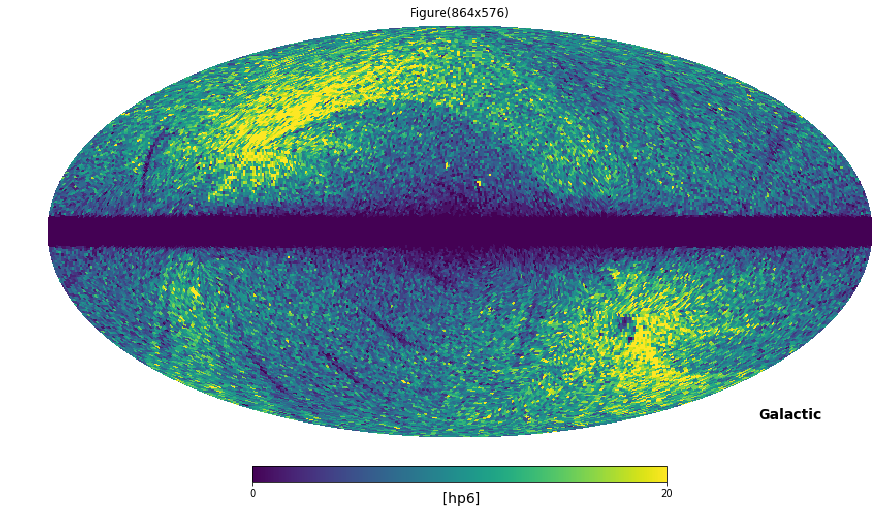

In [34]:
hpX.setHpCount(dsim)
f = plt.figure()
hpX.plot(f,vmin=0,vmax=20,cmap=mp.cm.viridis,coord='G')

In [35]:
%time dsim.to_csv("../data/DR2simALLwiseQSO.csv")

CPU times: user 12.5 s, sys: 449 ms, total: 13 s
Wall time: 13 s


In [36]:
dsim.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393907 entries, 1165863 to 885716
Columns: 29 entries, WISEA to parallax
dtypes: float32(4), float64(18), int64(1), object(6)
memory usage: 84.1+ MB
